In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ref:http://vision.psych.umn.edu/users/kersten/kersten-lab/courses/Psy5036W2015/Lectures/17_PythonForVision/Demos/html/2b.Gabor.html

(224, 225, 3)


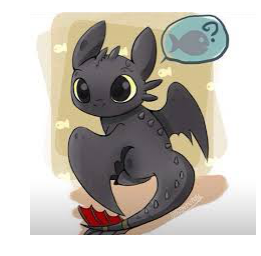

In [13]:
InteractiveShell.ast_node_interactivity = "none"
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

fname = './data/toothless.jpg'
img = cv2.imread(fname)

if img is None:
    print('Failed to load image file: ', fname)
    sys.exit(1)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    print(img.shape)

`cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma[, psi[, ktype]]) → retval`

Parameters:	

`ksize` – Size of the filter returned.

`sigma` – Standard deviation of the gaussian envelope.

`theta` – Orientation of the normal to the parallel stripes of a Gabor function.

`lambd` – Wavelength of the sinusoidal factor.

`gamma` – Spatial aspect ratio.

`psi` – Phase offset.

`ktype` – Type of filter coefficients. It can be CV_32F or CV_64F 

In [69]:
import numpy as np
import cv2 

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

# convolve the image with the filters
def convolve(img, filters):
    """ Take an image, and a set of filters, convolve, return all convolved images."""
    convolved = []
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        convolved.append(fimg)
    return convolved

# convolve the image with the filters
def convolve_and_condense(img, filters):
    """ Take an image, and a set of filters, convolve, 
    condense all convoled images buy keeping the maximum values only, 
    return only one image."""
    condensed = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(condensed, fimg, condensed)
    return condensed

### Changing `thetha`: Orientation of the normal to the parallel stripes of a Gabor function.

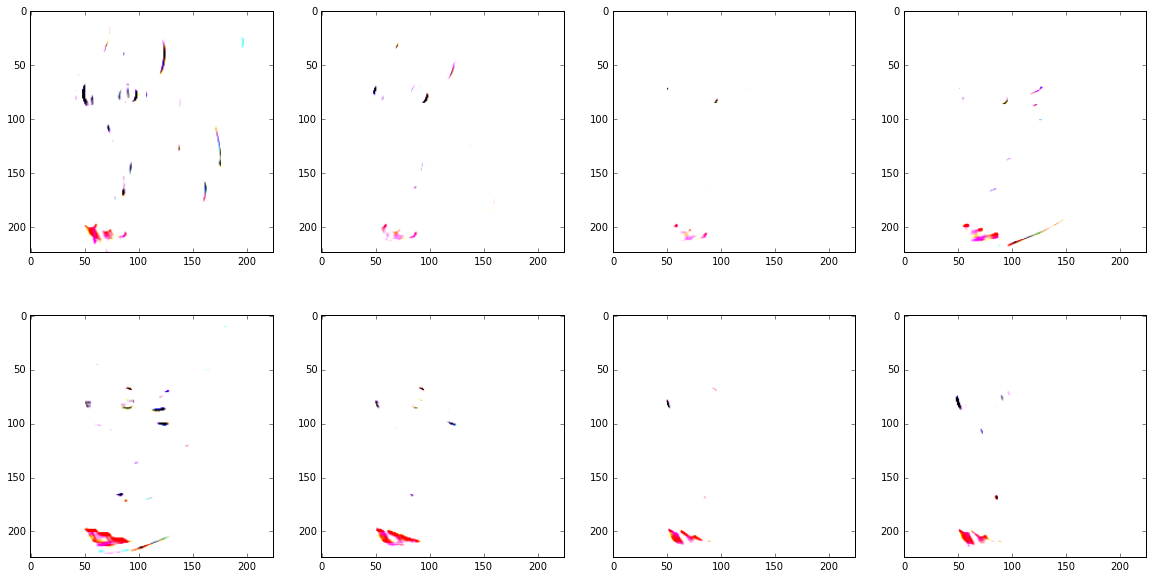

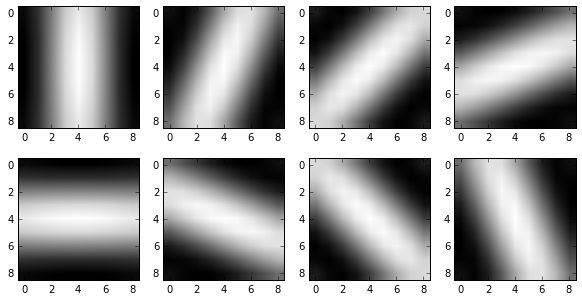

In [92]:
InteractiveShell.ast_node_interactivity = "none"

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for theta in np.arange(0, np.pi, np.pi / 8):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

filters = build_filters()
img_out = convolve(img, filters)
#img_out2 = convolve_and_condense(img, filters)

plt.figure(figsize=(20,10))
for i, item in enumerate(img_out):
    plt.subplot(2,4,i+1)
    plt.imshow(item)

plt.figure(figsize=(10,5))
for i, item in enumerate(filters):
    plt.subplot(2,4,i+1)
    plt.imshow(item, cmap='gray')
#plt.imshow(img_out2)
#plt.show()

### Changing `sigma` – Standard deviation of the gaussian envelope

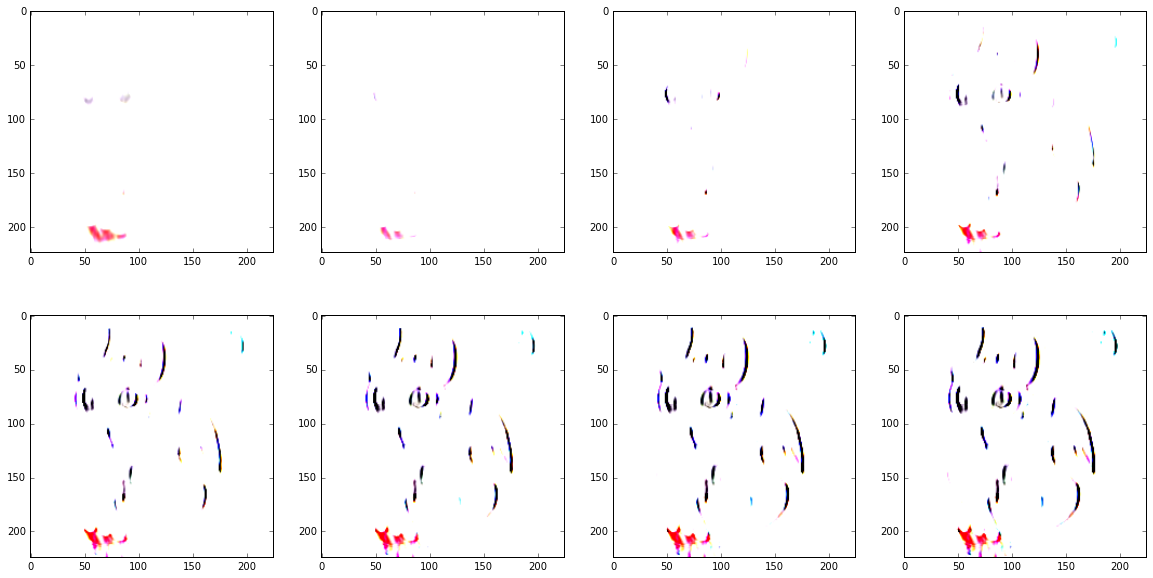

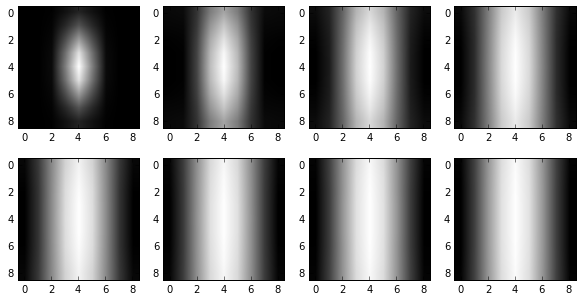

In [93]:
InteractiveShell.ast_node_interactivity = "none"

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for sigma in range(1,9):
        kern = cv2.getGaborKernel((ksize, ksize), sigma=sigma, theta=0, lambd=10.0, gamma=0.5, psi=0, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

filters = build_filters()
img_out = process(img, filters)

plt.figure(figsize=(20,10))
for i, item in enumerate(img_out):
    plt.subplot(2,4,i+1)
    plt.imshow(item)
    
plt.figure(figsize=(10,5))
for i, item in enumerate(filters):
    plt.subplot(2,4,i+1)
    plt.imshow(item, cmap='gray')

### Changing `lambd` – Wavelength of the sinusoidal factor

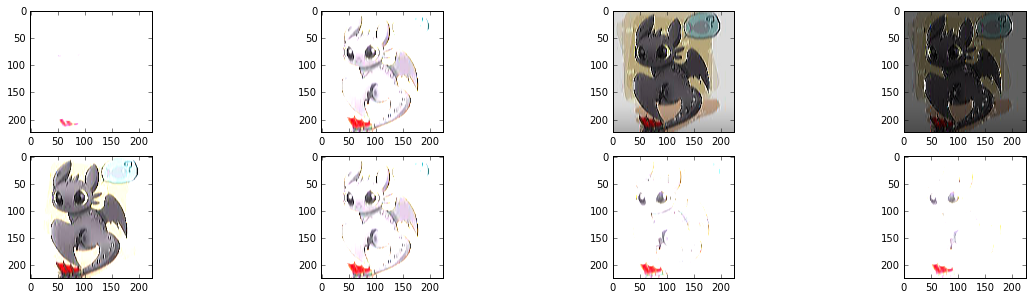

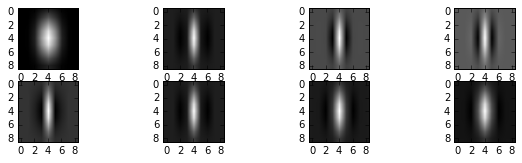

In [105]:
InteractiveShell.ast_node_interactivity = "none"

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for lambd in np.arange(0.01, 2*np.pi, 2*np.pi / 8):
        kern = cv2.getGaborKernel((ksize, ksize), sigma=1, theta=0, lambd=lambd, gamma=0.5, psi=0, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

filters = build_filters()
img_out = process(img, filters)

plt.figure(figsize=(20,10))
for i, item in enumerate(img_out):
    plt.subplot(4,4,i+1)
    plt.imshow(item)
    
plt.figure(figsize=(10,5))
for i, item in enumerate(filters):
    plt.subplot(4,4,i+1)
    plt.imshow(item, cmap='gray')

### Changing `gamma` – Spatial aspect ratio

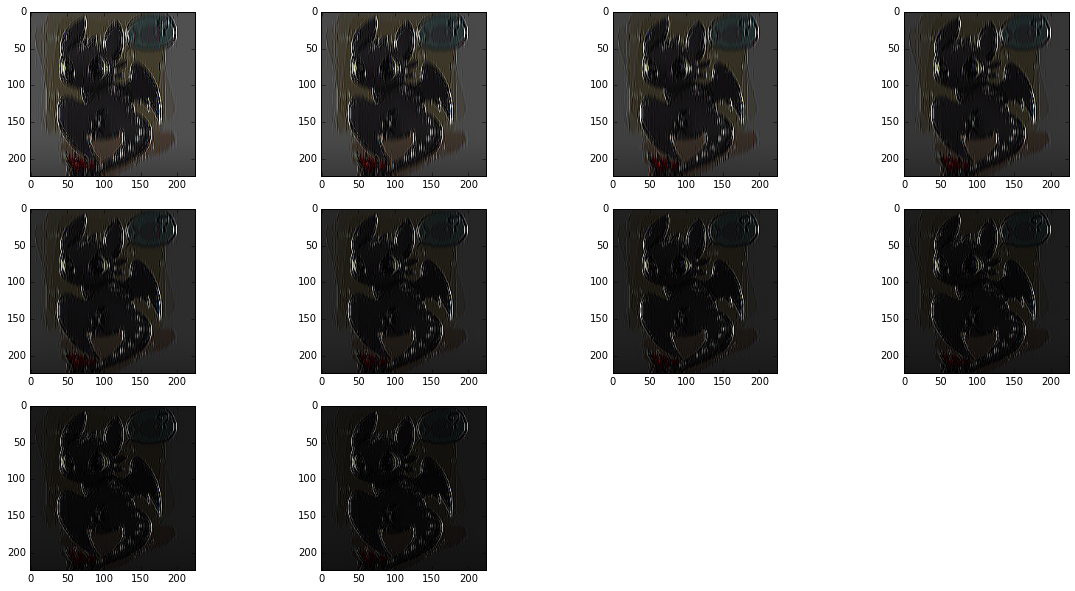

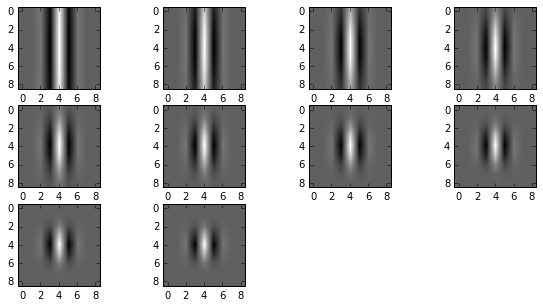

In [96]:
InteractiveShell.ast_node_interactivity = "none"

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for gamma in range(1,11):
        kern = cv2.getGaborKernel((ksize, ksize), sigma=1, theta=0, lambd=2, gamma=gamma/10, psi=0, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

filters = build_filters()
img_out = process(img, filters)

plt.figure(figsize=(20,10))
for i, item in enumerate(img_out):
    plt.subplot(3,4,i+1)
    plt.imshow(item)
    
plt.figure(figsize=(10,5))
for i, item in enumerate(filters):
    plt.subplot(3,4,i+1)
    plt.imshow(item, cmap='gray')

### Changing `psi` – Phase offset.

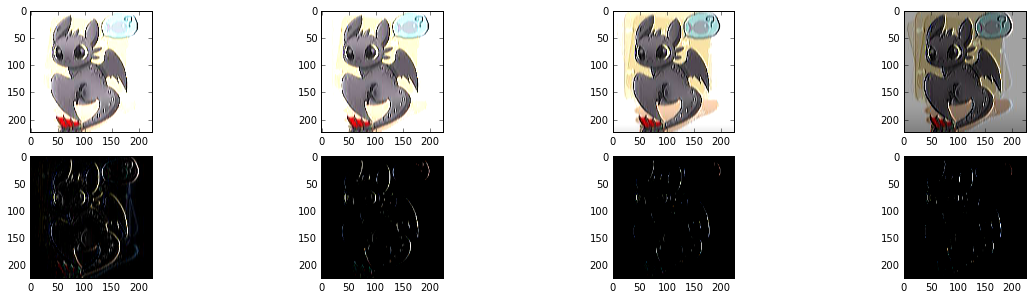

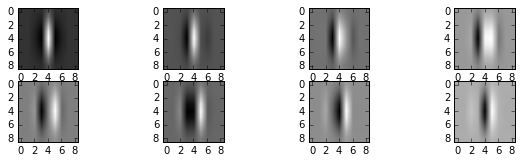

In [106]:
InteractiveShell.ast_node_interactivity = "none"

# build a set of gabor filters
def build_filters():
    filters = []
    ksize = 9
    for psi in np.arange(0, np.pi, np.pi / 8):
        kern = cv2.getGaborKernel((ksize, ksize), sigma=1, theta=0, lambd=np.pi, gamma=0.5, psi=psi, ktype=cv2.CV_32F)
        filters.append(kern)
    return filters

filters = build_filters()
img_out = process(img, filters)

plt.figure(figsize=(20,10))
for i, item in enumerate(img_out):
    plt.subplot(4,4,i+1)
    plt.imshow(item)
    
plt.figure(figsize=(10,5))
for i, item in enumerate(filters):
    plt.subplot(4,4,i+1)
    plt.imshow(item, cmap='gray')